In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
sns.set_style('darkgrid')
sns.set_palette('viridis')

In [2]:
df = pd.read_csv('generic_polllist.csv')

In [3]:
df.head()

subgroup  modeldate   startdate     enddate       pollster grade  \
0  All polls  11/2/2020  11/30/2018   12/2/2018  Winston Group   B/C   
1  All polls  11/2/2020  12/29/2018  12/30/2018  Winston Group   B/C   
2  All polls  11/2/2020  12/31/2018    1/2/2019        HarrisX     C   
3  All polls  11/2/2020    1/1/2019    1/3/2019        HarrisX     C   
4  All polls  11/2/2020    1/2/2019    1/4/2019        HarrisX     C   

   samplesize population    weight  influence  ...   rep  adjusted_dem  \
0        1000         rv  0.753612        0.0  ...  41.0     47.695445   
1        1000         rv  0.611841        0.0  ...  41.0     48.695445   
2        3012         rv  0.032487        0.0  ...  35.0     49.540052   
3        3012         rv  0.031667        0.0  ...  35.0     48.540052   
4        3003         rv  0.030810        0.0  ...  36.0     47.540052   

   adjusted_rep  multiversions tracking  \
0     40.964974            NaN      NaN   
1     40.964974            NaN      NaN   
2     38.812195            NaN        T   
3     38.812195            NaN        T   
4     39.812195            NaN        T   

                                                 url poll_id  question_id  \
0  https://www.winningtheissues.org/wp-content/up...   66565       124055   
1  https://www.winningtheissues.org/wp-content/up...   66581       124115   
2   https://scottrasmussen.com/generic-ballot-daily/   57208        92471   
3   https://scottrasmussen.com/generic-ballot-daily/   57218        92479   
4   https://scottrasmussen.com/generic-ballot-daily/   57221        92483   

   createddate             timestamp  
0    5/29/2020  17:54:12  2 Nov 2020  
1    5/29/2020  17:54:12  2 Nov 2020  
2     1/3/2019  17:54:12  2 Nov 2020  
3     1/4/2019  17:54:12  2 Nov 2020  
4     1/5/2019  17:54:12  2 Nov 2020  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subgroup       853 non-null    object 
 1   modeldate      853 non-null    object 
 2   startdate      853 non-null    object 
 3   enddate        853 non-null    object 
 4   pollster       853 non-null    object 
 5   grade          829 non-null    object 
 6   samplesize     853 non-null    int64  
 7   population     853 non-null    object 
 8   weight         853 non-null    float64
 9   influence      853 non-null    float64
 10  dem            853 non-null    float64
 11  rep            853 non-null    float64
 12  adjusted_dem   853 non-null    float64
 13  adjusted_rep   853 non-null    float64
 14  multiversions  1 non-null      object 
 15  tracking       600 non-null    object 
 16  url            853 non-null    object 
 17  poll_id        853 non-null    int64  
 18  question_i

In [5]:
df.isnull().sum()

subgroup           0
modeldate          0
startdate          0
enddate            0
pollster           0
grade             24
samplesize         0
population         0
weight             0
influence          0
dem                0
rep                0
adjusted_dem       0
adjusted_rep       0
multiversions    852
tracking         253
url                0
poll_id            0
question_id        0
createddate        0
timestamp          0
dtype: int64

In [6]:
df.fillna('NULL',inplace=True)

In [9]:
df['modeldate'] = pd.to_datetime(df['modeldate'])
df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])
df['createddate'] = pd.to_datetime(df['createddate'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   subgroup       853 non-null    object        
 1   modeldate      853 non-null    datetime64[ns]
 2   startdate      853 non-null    datetime64[ns]
 3   enddate        853 non-null    datetime64[ns]
 4   pollster       853 non-null    object        
 5   grade          853 non-null    object        
 6   samplesize     853 non-null    int64         
 7   population     853 non-null    object        
 8   weight         853 non-null    float64       
 9   influence      853 non-null    float64       
 10  dem            853 non-null    float64       
 11  rep            853 non-null    float64       
 12  adjusted_dem   853 non-null    float64       
 13  adjusted_rep   853 non-null    float64       
 14  multiversions  853 non-null    object        
 15  tracking       853 non-

In [11]:
def find_minmax(x):
    min_index = df[x].idxmin()
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.iloc[high_index,:])
    low = pd.DataFrame(df.iloc[min_index,:])
    print('with Highest ' + x + ':',df['pollster'][high_index])
    print('with Lowest ' + x + ':',df['pollster'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('adjusted_dem')

with Highest adjusted_dem: YouGov
with Lowest adjusted_dem: Georgetown University/Battleground


832  \
subgroup                                               All polls   
modeldate                                    2020-11-02 00:00:00   
startdate                                    2020-10-23 00:00:00   
enddate                                      2020-10-25 00:00:00   
pollster                                                  YouGov   
grade                                                          B   
samplesize                                                  1350   
population                                                    lv   
weight                                                  0.262019   
influence                                               0.210057   
dem                                                         54.0   
rep                                                         41.0   
adjusted_dem                                           53.986553   
adjusted_rep                                           42.083719   
multiversions                                               NULL   
tracking                                                    NULL   
url            https://docs.cdn.yougov.com/fsf95uprtd/2020102...   
poll_id                                                    71973   
question_id                                               134923   
createddate                                  2020-10-26 00:00:00   
timestamp                                   17:54:12  2 Nov 2020   

                                                             119  
subgroup                                               All polls  
modeldate                                    2020-11-02 00:00:00  
startdate                                    2019-03-31 00:00:00  
enddate                                      2019-04-04 00:00:00  
pollster                      Georgetown University/Battleground  
grade                                                        A/B  
samplesize                                                  1000  
population                                                    lv  
weight                                                   1.57402  
influence                                                    0.0  
dem                                                         42.0  
rep                                                         37.0  
adjusted_dem                                           42.320141  
adjusted_rep                                           36.909542  
multiversions                                               NULL  
tracking                                                    NULL  
url            http://politics.georgetown.edu/wp-content/uplo...  
poll_id                                                    57846  
question_id                                                94014  
createddate                                  2019-04-09 00:00:00  
timestamp                                   17:54:12  2 Nov 2020

In [12]:
find_minmax('adjusted_rep')

with Highest adjusted_rep: Emerson College
with Lowest adjusted_rep: Morning Consult


26   \
subgroup                                               All polls   
modeldate                                    2020-11-02 00:00:00   
startdate                                    2019-01-20 00:00:00   
enddate                                      2019-01-21 00:00:00   
pollster                                         Emerson College   
grade                                                         A-   
samplesize                                                   942   
population                                                    rv   
weight                                                  1.289635   
influence                                                    0.0   
dem                                                         52.4   
rep                                                         47.6   
adjusted_dem                                           51.293708   
adjusted_rep                                           45.923051   
multiversions                                               NULL   
tracking                                                    NULL   
url            https://www.emerson.edu/news-events/emerson-co...   
poll_id                                                    57374   
question_id                                                92812   
createddate                                  2019-01-22 00:00:00   
timestamp                                   17:54:12  2 Nov 2020   

                                                             143  
subgroup                                               All polls  
modeldate                                    2020-11-02 00:00:00  
startdate                                    2019-04-19 00:00:00  
enddate                                      2019-04-21 00:00:00  
pollster                                         Morning Consult  
grade                                                        B/C  
samplesize                                                  1992  
population                                                    rv  
weight                                                  0.194468  
influence                                                    0.0  
dem                                                         45.0  
rep                                                         34.0  
adjusted_dem                                           46.816922  
adjusted_rep                                           35.266219  
multiversions                                               NULL  
tracking                                                    NULL  
url            https://morningconsult.com/wp-content/uploads/...  
poll_id                                                    57929  
question_id                                                94225  
createddate                                  2019-04-25 00:00:00  
timestamp                                   17:54:12  2 Nov 2020

<AxesSubplot:xlabel='grade', ylabel='samplesize'>

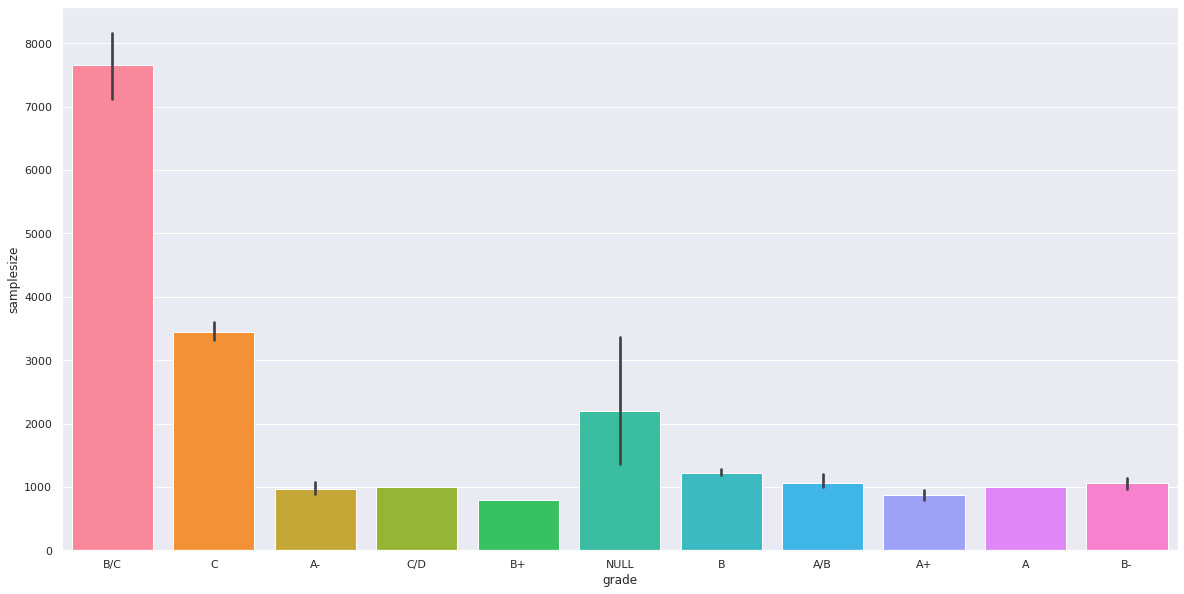

In [13]:

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x = 'grade',y = 'samplesize',data =df,saturation = 1)

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x= 'dem',y='pollster',data = df,saturation = 1,palette = 'viridis')

<AxesSubplot:xlabel='dem', ylabel='pollster'>

<AxesSubplot:xlabel='rep', ylabel='pollster'>

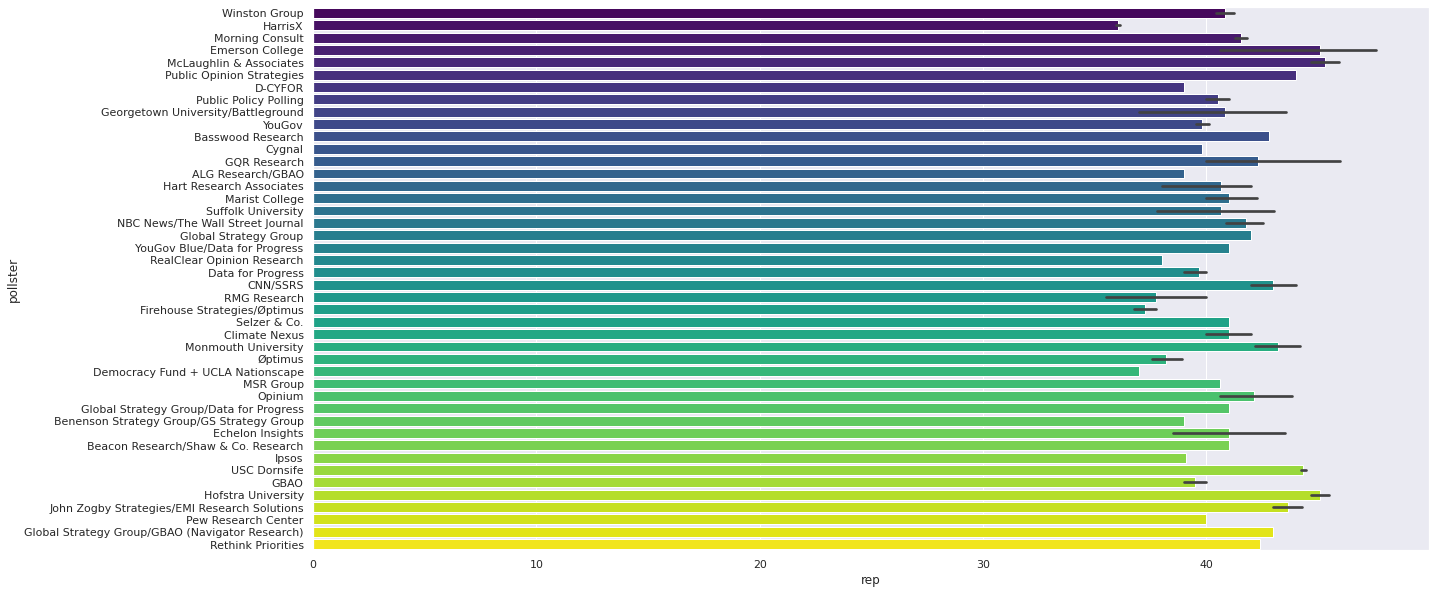

In [21]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x= 'rep',y='pollster',data = df,saturation = 1,palette = 'viridis')

In [22]:
fig = px.bar(df, x = 'rep',y='pollster',color = 'weight', title='Republican count by Pollster, weight is color')
fig.show()

In [24]:
fig = px.bar(df, x = 'dem',y='pollster',color = 'weight', title='Democrat count by Pollster, weight is color')
fig.show()

In [26]:
fig = px.bar(df, x='rep',y='pollster', color = 'grade', title='Republican count by pollster , grade as color')
fig.show()

In [27]:
fig= px.bar(df, x ='dem', y='pollster', color = 'grade', title='Democrat count by pollster, grade as color')
fig.show()

In [28]:
sns.pairplot(df, hue='grade')

In [39]:
x1= df['dem']
x2= df['rep']
y1=df['pollster']
y2 =df['pollster']
plt.plot(x1,y1,label='Democrats',linestyle="-")
plt.plot(x2,y2,label ='Republicans',linestyle = "--")
plt.legend()
plt.show()